In [27]:
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#### Exercise 1

If $X \sim \text{Exp}(\beta)$, then $E[X] = \beta$ and $V[X] = \beta^2$ from the table on p. 53.

Thus,
$$P(|X - \beta| \geq k\beta) = P(X - \beta \geq k\beta) = P(X \geq (k+1)\beta) = \int_0^{+\infty} \frac{1}{\beta} e^{-\frac{x}{\beta}} dx = e^{-(k+1)}.$$

From Chebyshev's inequality on the other hand,
$$P(|X - \beta| \geq k\beta) \leq \frac{1}{k^2}.$$

We can see that the Chebyshev's bound is polynomial, whereas the exact probability decreases exponentially.

#### Exercise 2

If $X \sim \text{Poisson}(\lambda)$, then $E[X] = \lambda$ and $V[X] = \lambda$ from the table on p. 53.

Thus from Chebyshev's inequality,
$$P(X \geq 2 \lambda) = P(|X - \lambda| \geq \lambda) = \frac{1}{\lambda}.$$

#### Exercise 3

Given $X_1, \dots, X_n \sim \text{Bernoulli}(p)$, we have $E[X_1]=\dots=E[X_n]=p$ and $V[X_1]=\dots=V[X_n]=p(1-p)$.

The statement of the problem does not specify that $X_1, \dots, X_n$ are independent.

Suppose $X_1 = \dots = X_n$, then $\bar{X}_n = X_1$ and from Theorem 4.5 we have
$$P(|\bar{X}_n - p| \geq \epsilon) \leq 2 e^{-2\epsilon^2}.$$

On the other hand, from Chebyshev's inequality,
$$P(|\bar{X}_n - p| \geq \epsilon) \leq \frac{p (1-p)}{\epsilon^2}.$$



Suppose now that $X_1, \dots, X_n$ are independent, then from Theorem 4.5 we have
$$P(|\bar{X}_n - p| \geq \epsilon) \leq 2 e^{-2n\epsilon^2}.$$
By Theorem 3.17, $V[\bar{X}_n] = \frac{p(1-p)}{n}$
and from Chebyshev's inequality
$$P(|\bar{X}_n - p| \geq \epsilon) \leq \frac{p(1-p)}{n \epsilon^2}.$$

In either case, the bound provided by the Hoeffding's inequality is tighter than the one provided by the Chebyshev's inequality.

#### Exercise 4

(a) Taking
$$\epsilon_n = \sqrt{\frac{1}{2n}\log\left(\frac{2}{\alpha}\right)},$$
from Theorem 4.5 we have
$$P(|\bar{X}_n - p| > \epsilon_n) \leq 2e^{-2n\epsilon_n^2} = \alpha,$$
so
$$P(|\bar{X}_n - p| \leq \epsilon_n) = 1 - P(|\bar{X}_n - p| > \epsilon_n) > 1 - \alpha,$$
and finally
$$P(|\bar{X}_n - p| \leq \epsilon_n) \geq 1 - \alpha.$$

(b)

In [2]:
alpha = 0.05
p = 0.4

In [4]:
n_max = 10000
k = 1000

In [8]:
x = stats.bernoulli.rvs(p=p, size=(k, n_max))

In [16]:
n = np.arange(1, n_max + 1)
eps_n = np.sqrt(1 / 2 / n * np.log(2 / alpha))
Xn = np.cumsum(x, axis=1) / n
lb = Xn - eps_n
ub = Xn + eps_n
covers = (lb <= p) & (p <= ub)
coverage = np.mean(covers, axis=0)

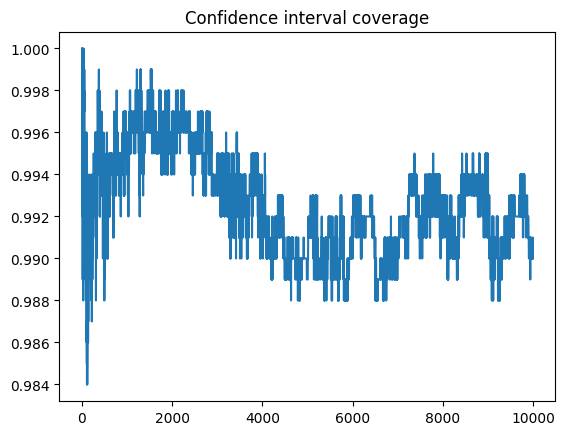

In [19]:
fig, ax = plt.subplots()
ax.plot(n, coverage);
ax.set_title('Confidence interval coverage');

(c)

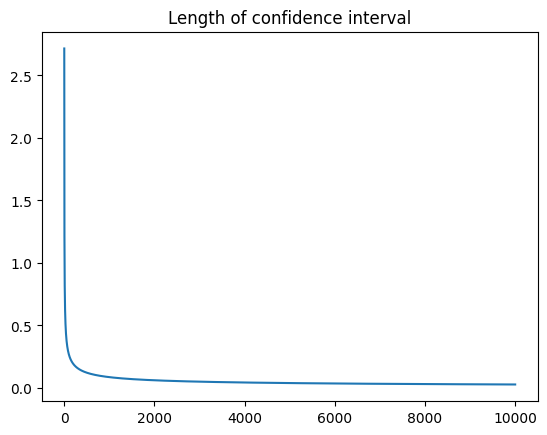

In [21]:
fig, ax = plt.subplots()
ax.plot(n, 2 * eps_n);
ax.set_title('Length of confidence interval');

To get $\epsilon_n \leq \epsilon$, we need 
$$n \geq \frac{1}{2\epsilon} \log\left(\frac{2}{\alpha}\right).$$

In [22]:
eps = 0.05
1 / 2 / eps * np.log(2 / alpha)

36.88879454113936

#### Exercise 5

If $Z \sim N(0, 1)$, then

$$
P(|Z|>T) = 2 P(Z > t) = 2 \int_t^{+\infty} \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} dx 
\leq \frac{2}{\sqrt{2\pi}} \int_t^{+\infty} \frac{x}{t} e^{-\frac{x^2}{2}} dx
= \frac{2}{\sqrt{2\pi} t} \int_t^{+\infty} x e^{-\frac{x^2}{2}} dx
= \frac{1}{\sqrt{2\pi} t} \int_{t^2}^{+\infty} e^{-\frac{y}{2}} dy
= \frac{1}{\sqrt{2\pi} t} \left.\left(-2e^{-\frac{y}{2}}\right)\right|_{t^2}^{+\infty}
= \sqrt{\frac{2}{\pi}} \frac{e^{-\frac{t^2}{2}}}{t}.
$$

#### Exercise 6

Recall that
$$
\begin{split}
&\int_0^{+\infty}e^{-\frac{x^2}{2}} dx = \sqrt{\frac{\pi}{2}}, \\
&\int_0^{+\infty}x^{2n} e^{-\frac{x^2}{2}} dx = (2n-1)!! \sqrt{\frac{\pi}{2}}, \\
&\int_0^{+\infty}x^{2n+1}e^{-\frac{x^2}{2}} dx = (2n)!!, \\
\end{split}
$$
where
$$
\begin{split}
(2n)!! &= 2^n n!, \\
(2n-1)!! &= \frac{(2n-1)!}{2^{n-1} (n-1)!}.
\end{split}
$$

In [36]:
def expectation_abs(k: int) -> float:
    if k == 0:
        return np.sqrt(2 * np.pi)
    elif k % 2 == 0:
        return math.factorial(k - 1) / 2 ** (k // 2 - 2) / math.factorial(k // 2 - 1) * np.sqrt(np.pi / 2)
    else:
        return 2 ** (k // 2 + 1) * math.factorial(k // 2)

In [54]:
def mill(t: float) -> float:
    return np.sqrt(2 / np.pi) * np.exp(-t ** 2 / 2) / t

In [56]:
t = np.linspace(0.05, 5, 100)

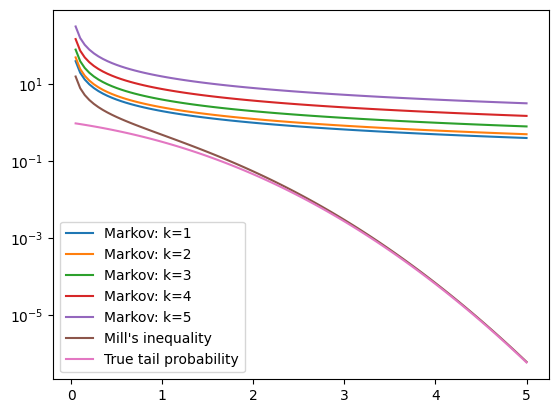

In [59]:
fig, ax = plt.subplots()
for k in range(1, 6):
    ax.plot(t, expectation_abs(k) / t, label=f'Markov: k={k}');
ax.plot(t, mill(t), label='Mill\'s inequality');
ax.plot(t, 2 * stats.norm.sf(t), label='True tail probability');
ax.legend();
ax.set_yscale('log');

#### Exercise 7

The statement of the problem does not specify that $X_1, \dots, X_n$ are independent.

Suppose $X_1 = \dots = X_n$, then $\bar{X}_n = X_1$, and then from Mill's inequality
$$P(|\bar{X}_n| > t) \leq \sqrt{\frac{2}{\pi}} \frac{e^{-\frac{t^2}{2}}}{t},$$
whereas from Chebyshev's inequality:
$$P(|\bar{X}_n| > t) \leq \frac{1}{t^2}.$$

Now suppose $X_1, \dots, X_n$ are independent. Then $\bar{X}_n \sim N\left(0, \frac{1}{n}\right)$ and $\sqrt{n} \bar{X}_n \sim N(0, 1)$, so from Mill's inequality we have
$$P(|\bar{X}_n| > t) = P(\sqrt{n}|\bar{X}_n| > \sqrt{n}t) \leq \sqrt{\frac{2}{\pi}} \frac{e^{-\frac{n t^2}{2}}}{\sqrt{n} t},$$
and from Chebyshev's inequality:
$$P(|\bar{X}_n| > t) = P(\sqrt{n}|\bar{X}_n| > \sqrt{n}t) \leq \frac{1}{n t^2}.$$